In [49]:
import pickle
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from utils import ProgressBar,Dataset
plt.style.use('ggplot')
%matplotlib inline

In [5]:
en_words = list(map(lambda x:x.split('\t'), open('middleresult/en_vocab.txt').read().split('\n')))
zh_words = list(map(lambda x:x.split('\t'), open('middleresult/zh_vocab.txt').read().split('\n')))

# words spread

In [38]:
def cal_convrate(x):
    x = list(x)
    sumarr = []
    total_sum = 0
    for i in x:
        total_sum += i
        sumarr.append(total_sum)
    sumarr = np.asarray(sumarr) / total_sum
    return sumarr

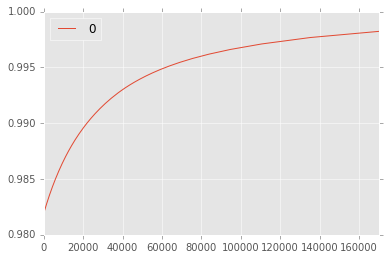

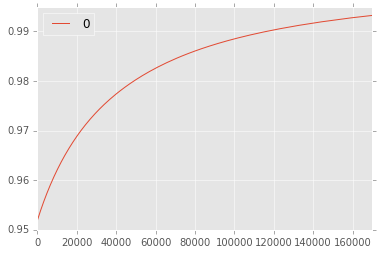

In [87]:
pd.DataFrame(cal_convrate(map(lambda x:int(x[1]),en_words[:-1]))[30000:200000]).plot()

pd.DataFrame(cal_convrate(map(lambda x:int(x[1]),zh_words[:-1]))[30000:200000]).plot()

In [62]:
en_sentences = []
zh_sentences = []

en_sentences_len = []
zh_sentences_len = []

pb = ProgressBar(worksum=10000000)
pb.startjob()
with open('middleresult/segmented_train_seg_by_word.txt') as fhdl:
    english_flag = False
    num = 0
    for line in fhdl:
        num += 1 if english_flag else 0
        linesp = line.strip()
        linesp = line.split(' ')
        english_flag = not english_flag 
        if english_flag:
            en_sentences.append(linesp)
            en_sentences_len.append(len(linesp))
        else:
            zh_sentences.append(linesp)
            zh_sentences_len.append(len(linesp))
        if english_flag and num % 10000 == 0:
            pb.complete(10000)

 100.00 % [==================================================>] 10000000/10000000 	 used:111s eta:0 s

In [63]:
len(en_sentences),len(zh_sentences)

(10000000, 10000000)

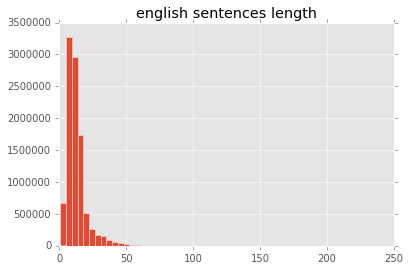

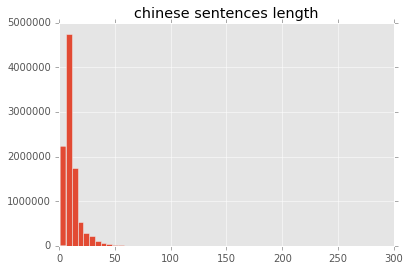

In [85]:
pd.DataFrame(en_sentences_len).hist(bins=50)
plt.title('english sentences length')
pd.DataFrame(zh_sentences_len).hist(bins=50)
plt.title('chinese sentences length')

In [78]:
en_sentences_len = np.asarray(en_sentences_len)
zh_sentences_len = np.asarray(zh_sentences_len)

In [88]:
sum = 1000
en_len_precent = []
zh_len_precent = []
for i in range(100):
    en_len_precent.append(np.average(en_sentences_len <= i))
for i in range(100):
    zh_len_precent.append(np.average(zh_sentences_len <= i))

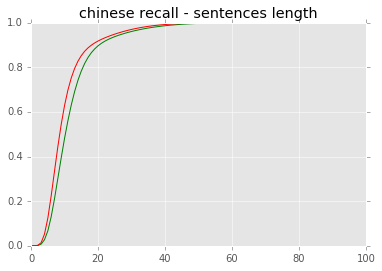

In [96]:
plt.plot(en_len_precent,'g',label='english')
plt.plot(zh_len_precent,'r',label='chinese')
plt.title('chinese recall - sentences length')

# some conclution